In [1]:
import pandas as pd

# Load the dataset
file_path = "1688640705_hr_comma_sep.xlsx"
df = pd.read_excel(file_path)

In [2]:
# Viewing & understandingdataset
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [3]:
# No. of rows & columns in dataset
df.shape

(14999, 10)

# Step 1: Perform data quality check by checking for missing values. And performing a one-hot encoding for 'sales' column and an ordinal encoding for 'salary' column

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [5]:
# Get unique values of 'sales' and 'salary' columns
unique_sales = df['sales'].unique()
unique_salary = df['salary'].unique()

print("Unique values in 'sales' column:", unique_sales)
print("Unique values in 'salary' column:", unique_salary)

Unique values in 'sales' column: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Unique values in 'salary' column: ['low' 'medium' 'high']


In [6]:
# One-hot encoding for 'sales' column
df_encoded = pd.get_dummies(df, columns=['sales'], prefix='dept')

# Ordinal encoding for 'salary' column
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}
df_encoded['salary'] = df_encoded['salary'].map(salary_mapping)

# Step 2: Understand what factors contributed most to employee turnover by EDA

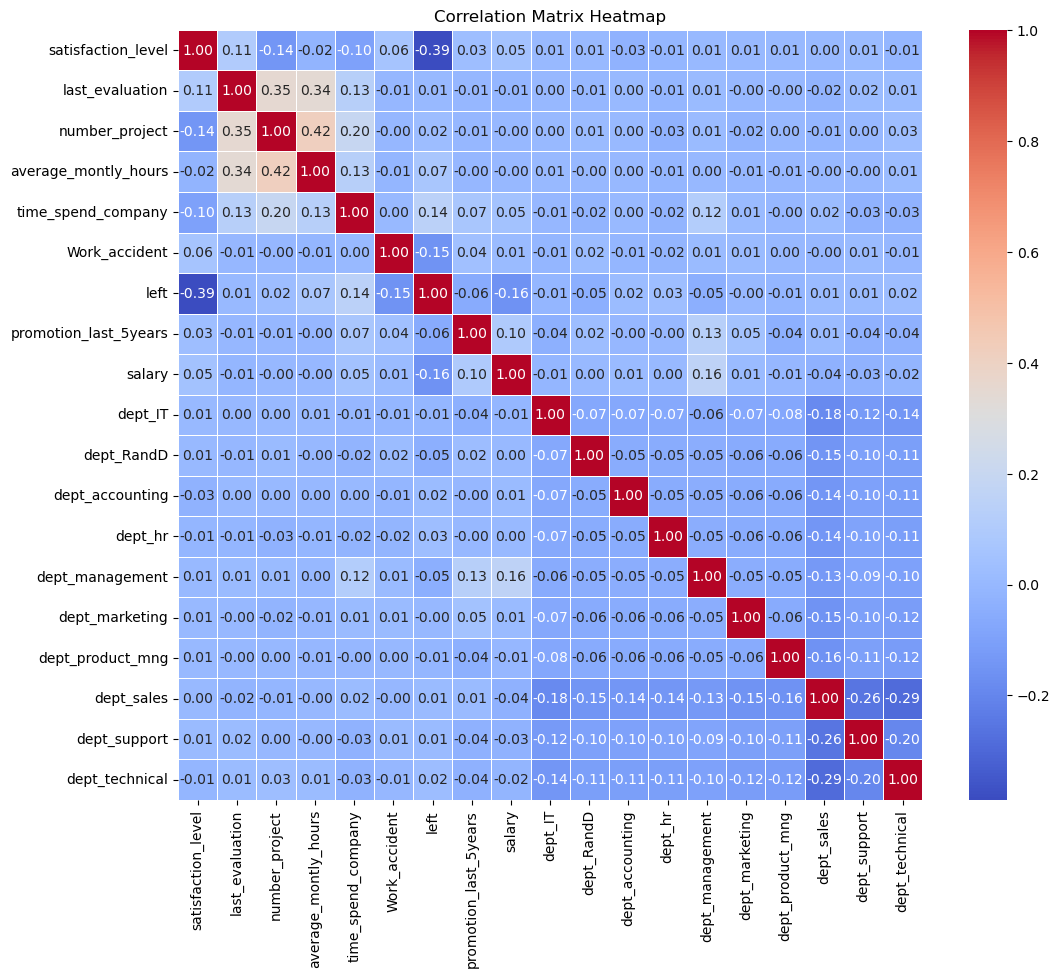

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# A heatmap of the Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

C:\Users\sun24\AppData\Local\Temp\ipykernel_20288\577672155.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_encoded['satisfaction_level'])
C:\Users\sun24\AppData\Local\Temp\ipykernel_20288\577672155.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_encoded['last_evaluation'])
C:\User

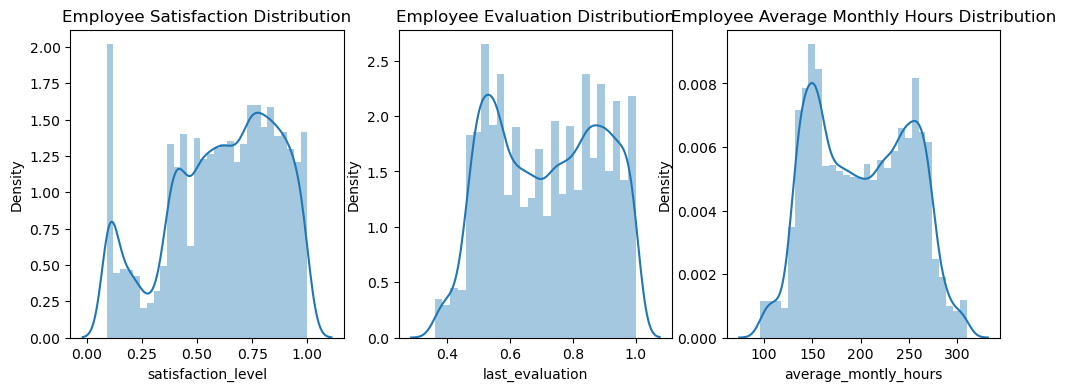

In [8]:
# Distribution plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.distplot(df_encoded['satisfaction_level'])
plt.title('Employee Satisfaction Distribution')

plt.subplot(1, 3, 2)
sns.distplot(df_encoded['last_evaluation'])
plt.title('Employee Evaluation Distribution')

plt.subplot(1, 3, 3)
sns.distplot(df_encoded['average_montly_hours'])
plt.title('Employee Average Monthly Hours Distribution')

plt.show()

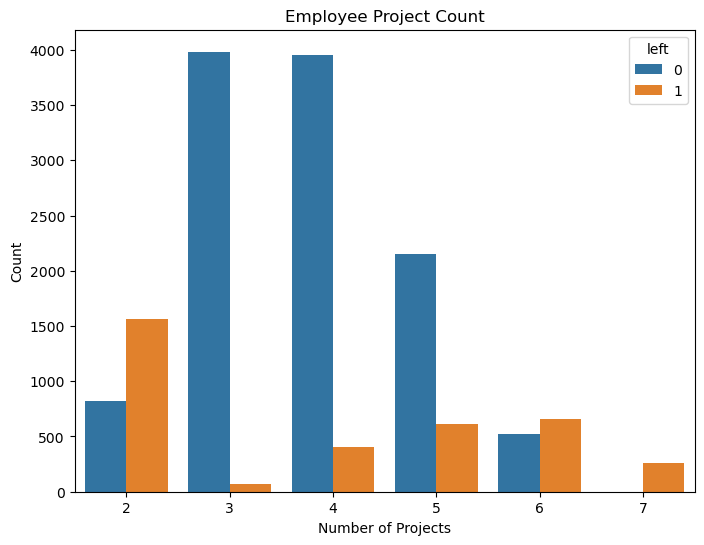

In [9]:
# Bar plot of Employee Project Count
plt.figure(figsize=(8, 6))
sns.countplot(x='number_project', hue='left', data=df_encoded)
plt.title('Employee Project Count')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.show()

# Step 3: Perform clustering of Employees who left based on their satisfaction and evaluation

In [10]:
from sklearn.cluster import KMeans

# 3.1 Choose columns
cluster_data = df_encoded[['satisfaction_level', 'last_evaluation', 'left']]

# 3.2 Do KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded['cluster'] = kmeans.fit_predict(cluster_data)

# 3.3 Give thoughts on employee clusters
cluster_analysis = df_encoded[df_encoded['left'] == 1].groupby('cluster').mean()
print("Employee Clusters Analysis:\n", cluster_analysis)

C:\Users\sun24\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Employee Clusters Analysis:
          satisfaction_level  last_evaluation  number_project  \
cluster                                                        
1                  0.440098         0.718113        3.855503   

         average_montly_hours  time_spend_company  Work_accident  left  \
cluster                                                                  
1                   207.41921            3.876505       0.047326   1.0   

         promotion_last_5years   salary   dept_IT  dept_RandD  \
cluster                                                         
1                     0.005321  0.41473  0.076449    0.033884   

         dept_accounting   dept_hr  dept_management  dept_marketing  \
cluster                                                               
1               0.057127  0.060207         0.025483        0.056847   

         dept_product_mng  dept_sales  dept_support  dept_technical  
cluster                                                              
1    

# Step 4: Handle the left Class Imbalance using SMOTE technique

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 4.1 Separate features and target variable
X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

# 4.2 Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

# 4.3 Upsample using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 5: Perform 5-Fold cross-validation model training and evaluate performance

In [12]:
# 5.1 Train a Logistic Regression model and apply 5-Fold CV and plot the classification report.

from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train Logistic Regression model
logistic_reg_model = LogisticRegression(random_state=42)
y_pred_logistic = cross_val_predict(logistic_reg_model, X_train_smote, y_train_smote, cv=5)

# Plot the classification report
print("Logistic Regression Classification Report:\n", classification_report(y_train_smote, y_pred_logistic))

C:\Users\sun24\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sun24\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      9142
           1       0.79      0.80      0.79      9142

    accuracy                           0.79     18284
   macro avg       0.79      0.79      0.79     18284
weighted avg       0.79      0.79      0.79     18284



C:\Users\sun24\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# 5.2 Train a Random Forest Classifier model and apply 5-Fold CV and plot the classification report.

from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier model
random_forest_model = RandomForestClassifier(random_state=42)
y_pred_rf = cross_val_predict(random_forest_model, X_train_smote, y_train_smote, cv=5)

# Plot the classification report
print("Random Forest Classification Report:\n", classification_report(y_train_smote, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       1.00      1.00      1.00      9142

    accuracy                           1.00     18284
   macro avg       1.00      1.00      1.00     18284
weighted avg       1.00      1.00      1.00     18284



In [14]:
# 5.3 Train a Gradient Boosting Classifier model and apply 5-Fold CV and plot the classification report.

from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Classifier model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
y_pred_gb = cross_val_predict(gradient_boosting_model, X_train_smote, y_train_smote, cv=5)

# Plot the classification report
print("Gradient Boosting Classification Report:\n", classification_report(y_train_smote, y_pred_gb))

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9142
           1       1.00      1.00      1.00      9142

    accuracy                           1.00     18284
   macro avg       1.00      1.00      1.00     18284
weighted avg       1.00      1.00      1.00     18284



# Step 6: Identify the best model and justify the evaluation metrics used

C:\Users\sun24\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


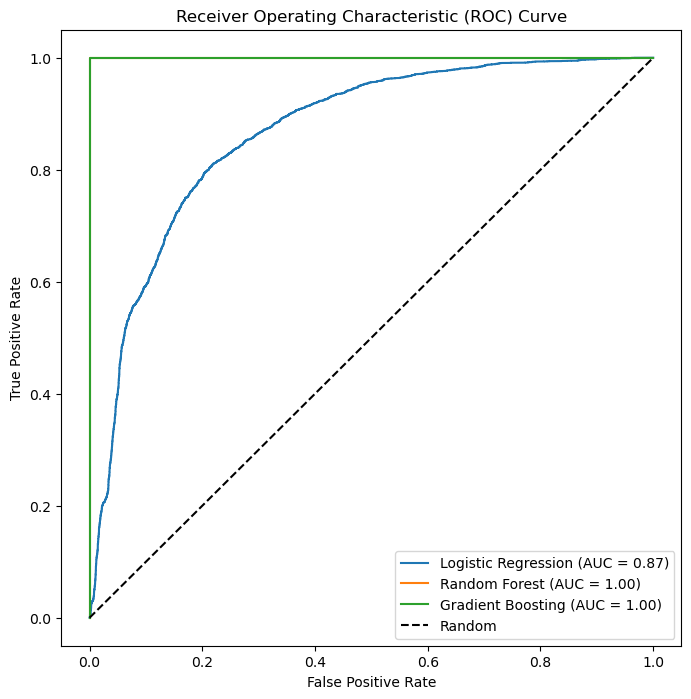

In [15]:
# 6.1 Find the ROC/AUC for each model and plot the ROC curve.

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(model, X, y, label):
    # Check if the model is fitted, if not, fit it
    if not hasattr(model, 'predict_proba') or not hasattr(model, 'classes_'):
        model.fit(X, y)

    fpr, tpr, _ = roc_curve(y, model.predict_proba(X)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Plot ROC curves for each model
plt.figure(figsize=(8, 8))
plot_roc_curve(logistic_reg_model, X_train_smote, y_train_smote, 'Logistic Regression')
plot_roc_curve(random_forest_model, X_train_smote, y_train_smote, 'Random Forest')
plot_roc_curve(gradient_boosting_model, X_train_smote, y_train_smote, 'Gradient Boosting')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


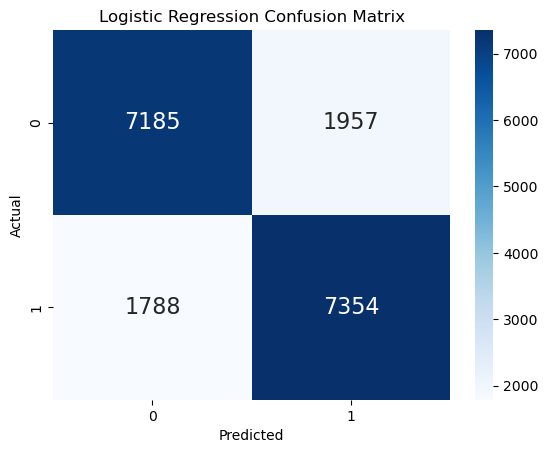

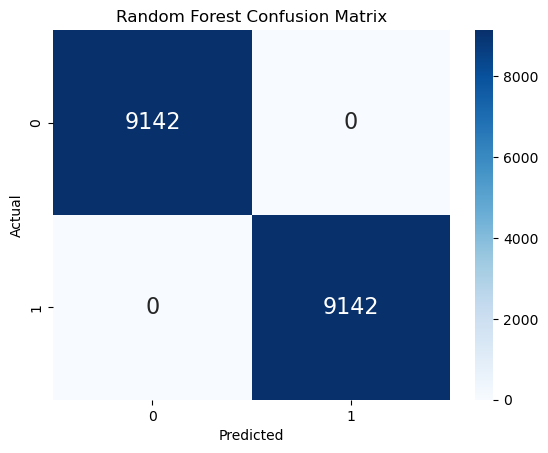

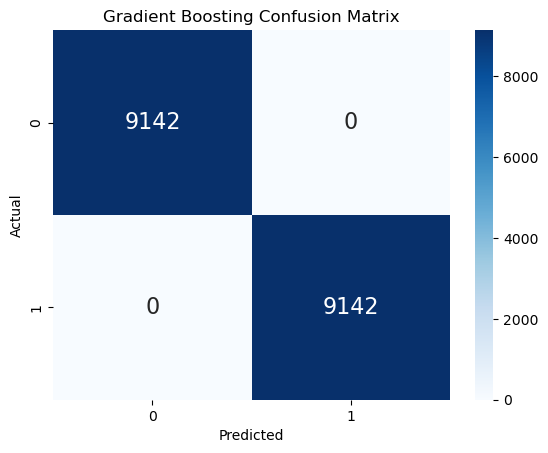

In [16]:
# 6.2 Find the confusion matrix for each of the models.

from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(model, X, y, label):
    cm = confusion_matrix(y, model.predict(X))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for each model
plot_confusion_matrix(logistic_reg_model, X_train_smote, y_train_smote, 'Logistic Regression')
plot_confusion_matrix(random_forest_model, X_train_smote, y_train_smote, 'Random Forest')
plot_confusion_matrix(gradient_boosting_model, X_train_smote, y_train_smote, 'Gradient Boosting')


# Step 7: Suggest various retention strategies for targeted employees

In [17]:
# 7.1 Using the best model, predict the probability of employee turnover in the test data.
# Here we are using the gradient_boosting_model

# Choosing the best model (based on the evaluation metrics)
best_model = gradient_boosting_model

# Predict probabilities for employee turnover in the test data
y_probabilities = best_model.predict_proba(X_test)[:, 1]

In [18]:
# 7.2 Based on the probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.

# Define probability score ranges
safe_zone = 0.2
low_risk_zone = 0.6
medium_risk_zone = 0.9

# Categorize employees based on probability scores
employee_categories = pd.cut(y_probabilities, bins=[-float('inf'), safe_zone, low_risk_zone, medium_risk_zone, float('inf')],
                              labels=['Safe Zone', 'Low Risk Zone', 'Medium Risk Zone', 'High Risk Zone'])

# Display the count of employees in each category
print("Employee Categories:")
print(employee_categories.value_counts())

# Provide retention strategies for each zone based on the business context
# For example:
# - Safe Zone: Recognize and reward performance to maintain satisfaction.
# - Low Risk Zone: Implement mentorship programs for skill development.
# - Medium Risk Zone: Conduct regular check-ins and address concerns proactively.
# - High Risk Zone: Develop targeted intervention plans to prevent turnover.

Employee Categories:
Safe Zone           2286
Low Risk Zone          0
Medium Risk Zone       0
High Risk Zone       714
Name: count, dtype: int64


In [19]:
# 7.3 Using the best model, predict the probability of employee turnover in the test data.
# Here we are using the logistic_reg_model

# Choosing the best model (based on the evaluation metrics)
best_model = logistic_reg_model

# Predict probabilities for employee turnover in the test data
y_probabilities = best_model.predict_proba(X_test)[:, 1]

In [20]:
# 7.2 Based on the probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.

# Define probability score ranges
safe_zone = 0.2
low_risk_zone = 0.6
medium_risk_zone = 0.9

# Categorize employees based on probability scores
employee_categories = pd.cut(y_probabilities, bins=[-float('inf'), safe_zone, low_risk_zone, medium_risk_zone, float('inf')],
                              labels=['Safe Zone', 'Low Risk Zone', 'Medium Risk Zone', 'High Risk Zone'])

# Display the count of employees in each category
print("Employee Categories:")
print(employee_categories.value_counts())

# Providing retention strategies for each zone based on the business context

# - Safe Zone: Recognize and reward performance to maintain satisfaction.
# - Low Risk Zone: Implement mentorship programs for skill development.
# - Medium Risk Zone: Conduct regular check-ins and address concerns proactively.
# - High Risk Zone: Develop targeted intervention plans to prevent turnover.

Employee Categories:
Safe Zone           1118
Low Risk Zone       1051
Medium Risk Zone     660
High Risk Zone       171
Name: count, dtype: int64


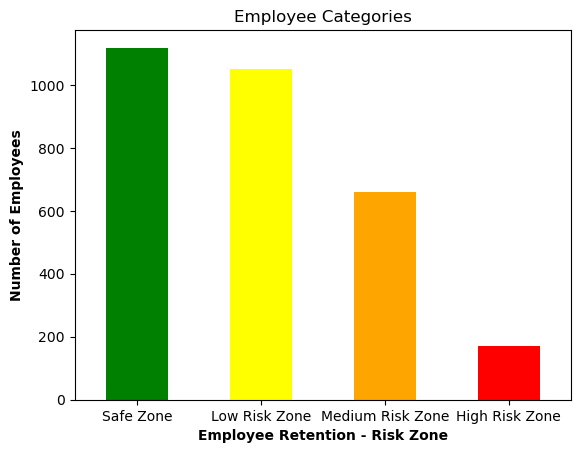

In [25]:
import matplotlib.pyplot as plt

# Plot the bar graph
employee_categories.value_counts().sort_index().plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.title('Employee Categories')
plt.xlabel('Employee Retention - Risk Zone', fontweight='bold')
plt.ylabel('Number of Employees', fontweight='bold')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


Now that we have categorized employees into different risk zones using the probability scores, we need to  suggesting retention strategies for each zone based on the business context. Below is an example of how we might suggest retention strategies for each zone:

Retention Strategies:
1. Safe Zone:
    Recognize and reward high-performing employees.
    Offer career development opportunities to keep them engaged.
    Regularly check in to ensure their continued satisfaction.
2. Low Risk Zone:
    Implement mentorship programs for skill development.
    Provide additional training to enhance their skills.
    Acknowledge their contributions to maintain satisfaction.
3. Medium Risk Zone:
    Conduct regular check-ins to understand their concerns.
    Offer opportunities for career growth and advancement.
    Provide additional support and resources as needed.
4. High Risk Zone:
    Develop targeted intervention plans to address specific concerns.
    Conduct exit interviews to gather insights into reasons for dissatisfaction.
    Implement immediate measures to improve their work experience.

These are just general suggestions, and we may need to tailor them based on the specifics of the organization and the feedback that we receive. 